In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
import sklearn 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
forest_data = pd.read_csv("AFFA.csv")

In [3]:
forest_data = pd.DataFrame(forest_data)

In [4]:
forest_data

,day,month,year,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Druff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Output
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [5]:
forest_data.shape

(122, 14)

In [6]:
forest_data.head()

,day,month,year,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Druff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Output
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [7]:
forest_data = forest_data.drop(['year'], axis=1)

In [8]:
forest_data.shape

(122, 13)

In [9]:
forest_data.head()

,day,month,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Druff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Output
0,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [10]:
X = np.asarray(forest_data[['month', 'Temperature', 'Relative_Humidity', 'Wind_Speed', 'Fine_Fuel_Moisture_Code', 'Druff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index', 'Buildup_Index', 'Fire_Weather_Index']])
Y = np.asarray(forest_data['Output'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 3, random_state = 100)

In [11]:
gini_classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=None, min_samples_leaf=5)
gini_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=100)

In [12]:
y_pred = gini_classifier.predict(X_test)

print("Predicted Values using Gini: ")
print(y_pred)
print()

print("Results using Gini")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred))

Predicted Values using Gini: 
[1 1 0]

Results using Gini
Confusion Matrix:  [[1 0]
 [0 2]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [13]:
entropy_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
entropy_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [14]:
y_pred1 = entropy_classifier.predict(X_test)

print("Predicted Values using entropy: ")
print(y_pred1)
print()
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred1))
print ("Accuracy : ", accuracy_score(y_test,y_pred1)*100) 
print("Report : ", classification_report(y_test, y_pred1))

Predicted Values using entropy: 
[1 1 0]

Confusion Matrix:  [[1 0]
 [0 2]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



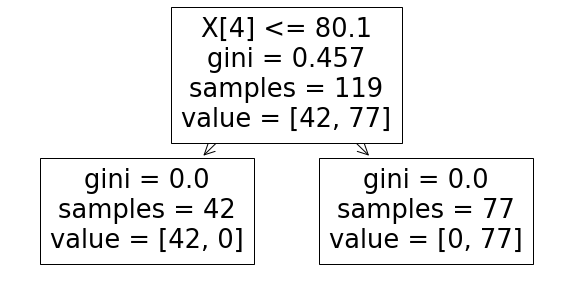

In [16]:
fig = plt.figure(figsize=(10,5))
t = tree.plot_tree(gini_classifier, filled = False)